In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/gdrive/My Drive/DS_contest/trainSet.csv')
data

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,354,134,3323,3298,15384,10746,0.583087,0.520701,0.202393,2015/05/21,2015/05/01,2021/07/31,Oil: CWS-DynaGel,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,Ceramic/Sand,FTecISP,30/50,35.48,638.70,638.70,558.91,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,372,142,3073,3054,20167,10440,1.059932,0.402927,0.242269,2014/10/16,2014/10/01,2021/07/31,Water: SLB-WaterFrac (WF),4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,Ceramic/Sand,HydroProp,40/80,13.80,496.97,496.97,3715.35,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383,146,3318,3291,18832,10745,1.913723,0.351151,0.274381,2019/03/14,2019/03/01,2021/07/31,Slickwater,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,Sand,Sand,40/70,95.03,5131.40,0.00,5131.40,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,395,148,3220,3188,20243,10884,0.185481,0.231014,0.305237,2019/03/19,2019/02/01,2021/07/31,Slickwater,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,Sand,White,40/70,49.90,3044.00,0.00,3044.00,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397,149,3220,3189,19085,10916,0.432910,0.214301,0.306795,2019/03/19,2019/02/01,2021/07/31,Slickwater,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,Sand,White,40/70,99.09,5351.00,0.00,5374.00,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,286,3048,3027,19462,10351,0.061657,0.368939,0.543000,2017/09/19,2017/09/01,2021/07/31,Slickwater,6209.34,159.21,4493

In [ ]:
data_exam = pd.read_csv('/gdrive/My Drive/DS_contest/examSet.csv')

In [ ]:
data.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'HRS_MONTH_31', 'HRS_MONTH_32', 'HRS_MONTH_33', 'HRS_MONTH_34',
       'HRS_MONTH_35', 'HRS_MONTH_36'],
      dtype='object', length=141)

In [ ]:
# df1.to_csv('/gdrive/My Drive/DS_contest/df1.csv')

In [ ]:
#length 232(i=0 to 231)의 data2 list 만들기 (각각의 원소는 series)
data2 = []
for i in range(48,280):
  data2.append(data.iloc[i])
data2[0]

No                               1
CPA Pretty Well ID               1
Reference (KB) Elev. (ft)     2908
Ground Elevation (ft)         2888
MD (All Wells) (ft)          20325
                             ...  
HRS_MONTH_32                   255
HRS_MONTH_33                   728
HRS_MONTH_34                   720
HRS_MONTH_35                   742
HRS_MONTH_36                   726
Name: 48, Length: 141, dtype: object

In [ ]:
#GAS_MONTH_1 ~ 36, Last 6 mo. Avg. GAS (Mcf), CND_MON_1 ~ 36, HRS_MONTH_1 ~ 36
#GAS , CND, HRS, time (1~36)]

#arb[i]는 series, data2[i], arbdf[i]는 데이터프레임
arb = []
arbdf = []
for i in range(232):
  arb.append(data2[i])
  data2[i] = data2[i].to_frame().transpose()
  arbdf.append(data2[i])
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726


In [ ]:
for i in range(232):
  for j in range(11):
    data2[i] = pd.concat([data2[i],arbdf[i]],axis=0,sort=False, join='outer')
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732

In [ ]:
# 32~67 GAS, 68:Last 6 mo. Avg. GAS (Mcf), 105~140 HRS
for i in range(232):
  GAS_list = []
  HRS_list = []
  ID_index = []
  for j in range(12):
    GAS_list.append(arb[i][3*j+32]+arb[i][3*j+33]+arb[i][3*j+34])
    HRS_list.append(arb[i][3*j+105]+arb[i][3*j+106]+arb[i][3*j+107])
    ID_index.append(i)
  data2[i]['Y_t'] = GAS_list
  data2[i]['J_t'] = HRS_list
  data2[i]['ID index'] = ID_index
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36,Y_t,J_t,ID index
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,418395.0,2025.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,352095.0,2017.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,260865.0,1982.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,226581.0,2164.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,187083.0,2120.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,2

In [ ]:
for i in range(232):
  for j in range(36):
    data2[i] = data2[i].drop('GAS_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('CND_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('HRS_MONTH_'+str(j+1),axis=1)
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,418395.0,2025.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,352095.0,2017.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,260865.0,1982.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,226581.0,2164.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,187083.0,2120.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,171573.0,2038.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,158340.0,2205.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,138864.0,2201.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,128325.0,2146.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,125439.0,1935.0,0


In [ ]:
import datetime as dt

In [ ]:
for i in range(232):
  time_list = []
  # time_list의 첫항은 (Last month - on month)/3 + 1
  time_list.append((dt.datetime.strptime(arb[i]['Last Prod. YYYY/MM'],'%Y/%m/%d') - dt.datetime.strptime(arb[i]['On Prod YYYY/MM/DD'],'%Y/%m/%d') - dt.timedelta(days=1095)).days // 92 + 1)
  for j in range(11):
    time_list.append(time_list[j]+1)
  data2[i]['time'] = time_list
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,418395.0,2025.0,0,2
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,352095.0,2017.0,0,3
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,260865.0,1982.0,0,4
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,226581.0,2164.0,0,5
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,187083.0,2120.0,0,6
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,171573.0,2038.0,0,7
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,158340.0,2205.0,0,8
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,138864.0,2201.0,0,9
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,128325.0,2146.0,0,10
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,125439.0,1935.0,0,11


In [ ]:
data2[9]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,792153.0,835.0,9,12
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,425277.0,1674.0,9,13
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,275604.0,2149.0,9,14
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,195702.0,2174.0,9,15
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,150300.0,1983.0,9,16
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,60696.0,1811.0,9,17
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,82101.0,2137.0,9,18
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,73365.0,416.0,9,19
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,57441.0,382.0,9,20
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,83010.0,1056.0,9,21


In [ ]:
#df2는 2번생산정만 포함, 각 생산정마다 12row 가짐.
df2 = data2[0]
for i in range(231):
  df2 = pd.concat([df2,data2[i+1]],axis=0,sort=False, join='outer')
df2

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,418395.0,2025.0,0,2
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,352095.0,2017.0,0,3
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,260865.0,1982.0,0,4
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,226581.0,2164.0,0,5
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,187083.0,2120.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,83559.0,2120.0,231,21
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,90450.0,2122.0,231,22
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,76983.0,1967.0,231,23
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,57549.0,2155.0,231,24


In [ ]:
df2.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)', 'First 6 mo. Avg. GAS (Mcf)',
       'Last 6 mo. Avg. GAS (Mcf)', 'Y_t', 'J_

In [ ]:
df2.rename(columns={'First 6 mo. Avg. GAS (Mcf)':'Y_first6'},inplace=True)
df2.rename(columns={'Last 6 mo. Avg. GAS (Mcf)':'Y_last6'},inplace=True)
df2 = df2.drop(['Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)', 'On Prod YYYY/MM/DD', 
       'First Prod YYYY/MM','Last Prod. YYYY/MM'],axis=1)
df2.head(5)

,No,CPA Pretty Well ID,TVD (ft),Stimulation Fluid,Total Proppant Placed (tonne),Proppant Name 1,Total Sand Proppant Placed (tonne),Y_first6,Y_last6,Y_t,J_t,ID index,time
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,418395.0,2025.0,0,2
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,352095.0,2017.0,0,3
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,260865.0,1982.0,0,4
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,226581.0,2164.0,0,5
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,187083.0,2120.0,0,6


In [ ]:
df2 = df2.drop(['CPA Pretty Well ID','TVD (ft)','Stimulation Fluid','Total Proppant Placed (tonne)','Proppant Name 1','Total Sand Proppant Placed (tonne)'], axis=1)
df2.head(5)

,No,TVD (ft),Y_first6,Y_last6,Y_t,J_t,ID index,time
48,1,10015,99180.3,40612.5,418395.0,2025.0,0,2
48,1,10015,99180.3,40612.5,352095.0,2017.0,0,3
48,1,10015,99180.3,40612.5,260865.0,1982.0,0,4
48,1,10015,99180.3,40612.5,226581.0,2164.0,0,5
48,1,10015,99180.3,40612.5,187083.0,2120.0,0,6


In [ ]:
df2.to_csv('/gdrive/My Drive/DS_contest/datathree.csv')

In [ ]:
# df2 = pd.read_csv('/gdrive/My Drive/DS_contest/datathree.csv')

X_t 처리

In [ ]:
df2['J_t'] += 1

In [ ]:
df2['X_t'] = df2['Y_t']/df2['J_t']
df2.head(5)

,No,TVD (ft),Y_first6,Y_last6,Y_t,J_t,ID index,time,X_t
48,1,10015,99180.3,40612.5,418395.0,2026.0,0,2,206.512833
48,1,10015,99180.3,40612.5,352095.0,2018.0,0,3,174.477205
48,1,10015,99180.3,40612.5,260865.0,1983.0,0,4,131.550681
48,1,10015,99180.3,40612.5,226581.0,2165.0,0,5,104.656351
48,1,10015,99180.3,40612.5,187083.0,2121.0,0,6,88.205092


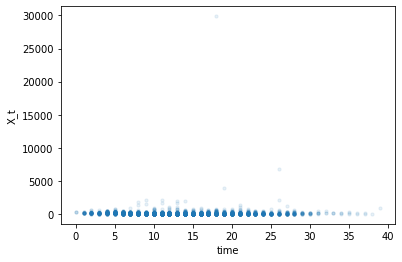

In [ ]:
df2.plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

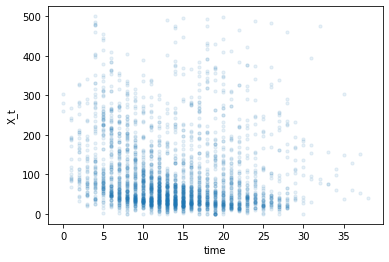

In [ ]:
df2[df2['X_t']<500].plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

X_t가 100 이하인 비율(%): 66.8103448275862
X_t가 100 초과 200 이하인 비율(%): 17.061781609195403
X_t가 200 초과 300 이하인 비율(%): 8.836206896551724
X_t가 300 초과 400 이하인 비율(%): 3.556034482758621
X_t가 400 초과 500 이하인 비율(%): 1.329022988505747
X_t가 500 초과인 비율(%): 2.406609195402299


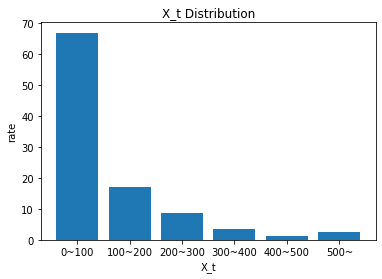

In [ ]:
print('X_t가 100 이하인 비율(%):',(df2[df2['X_t']<=100].size) / (df2.size) * 100)
print('X_t가 100 초과 200 이하인 비율(%):',(df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100)
print('X_t가 200 초과 300 이하인 비율(%):',(df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100)
print('X_t가 300 초과 400 이하인 비율(%):',(df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100)
print('X_t가 400 초과 500 이하인 비율(%):',(df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100)
print('X_t가 500 초과인 비율(%):',(df2[df2['X_t']>500].size) / (df2.size) * 100)

x = np.arange(6)
distri = ['0~100','100~200','200~300','300~400','400~500','500~']
value = [(df2[df2['X_t']<=100].size) / (df2.size) * 100, (df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100, (df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100, (df2[df2['X_t']>500].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('X_t')
plt.ylabel('rate')
plt.title('X_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_three_Distribution.png')
plt.show()

X_t가 500이하(97.6%의 데이터)인걸 normal

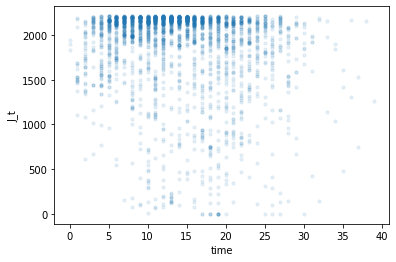

In [ ]:
df2.plot.scatter(x='time', y='J_t',s=10,alpha=0.1)

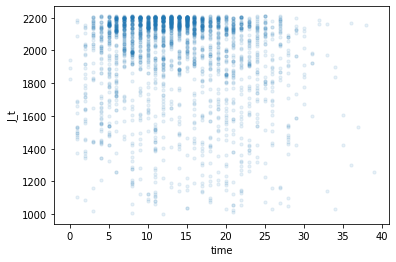

In [ ]:
df2[df2['J_t']>1000].plot.scatter(x='time', y='J_t',s=10,alpha=0.1)

J_t가 500시간 이하인 비율(%): 3.34051724137931
J_t가 500시간 초과 1000시간 이하인 비율(%): 3.9511494252873565
J_t가 1000시간 초과 1500시간 이하인 비율(%): 7.758620689655173
J_t가 1500시간 초과 2000시간 이하인 비율(%): 23.527298850574713
J_t가 2000시간 초과인 비율(%):              No TVD (ft) Y_first6  ...  ID index      time       X_t
48   0.00399106  39.9705  395.835  ...  0.000000  0.007982  0.824205
48   0.00399106  39.9705  395.835  ...  0.000000  0.011973  0.696349
48   0.00399106  39.9705  395.835  ...  0.000000  0.019955  0.417690
48   0.00399106  39.9705  395.835  ...  0.000000  0.023946  0.352032
48   0.00399106  39.9705  395.835  ...  0.000000  0.027937  0.335830
..          ...      ...      ...  ...       ...       ...       ...
279     2.88155  40.4294  146.437  ...  0.921935  0.075830  0.235916
279     2.88155  40.4294  146.437  ...  0.921935  0.083812  0.157232
279     2.88155  40.4294  146.437  ...  0.921935  0.087803  0.170038
279     2.88155  40.4294  146.437  ...  0.921935  0.095785  0.106531
279     2.88155  40.4294 

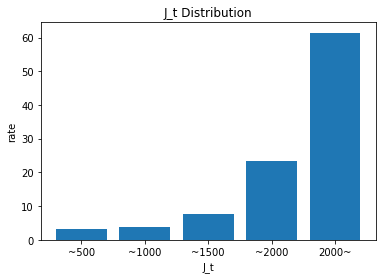

In [ ]:
print('J_t가 500시간 이하인 비율(%):',(df2[df2['J_t']<=500].size) / (df2.size) * 100)
print('J_t가 500시간 초과 1000시간 이하인 비율(%):',(df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100)
print('J_t가 1000시간 초과 1500시간 이하인 비율(%):',(df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100)
print('J_t가 1500시간 초과 2000시간 이하인 비율(%):',(df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100)
print('J_t가 2000시간 초과인 비율(%):',(df2[(df2['J_t']>2000)] / (df2.size) * 100))


x = np.arange(5)
distri = ['~500','~1000','~1500','~2000','2000~']
value = [(df2[df2['J_t']<=500].size) / (df2.size) * 100, (df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100, (df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>2000)].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('J_t')
plt.ylabel('rate')
plt.title('J_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/J_t_three_Distribution.png')
plt.show()

J_t는 1000시간 초과를(약 92.6%의 데이터) normal이라 하자


In [ ]:
df2['normal'] = ((df2['J_t']>1000) & (df2['X_t']<=500) & (df2['Y_t']>5000))
df2 = df2.astype({'normal':'int'})
df2.head(5)

,No,Y_t,J_t,ID index,time,X_t,normal
48,1,418395.0,2026.0,0,2,206.512833,1
48,1,352095.0,2018.0,0,3,174.477205,1
48,1,260865.0,1983.0,0,4,131.550681,1
48,1,226581.0,2165.0,0,5,104.656351,1
48,1,187083.0,2121.0,0,6,88.205092,1


In [ ]:
df2 = df2.drop(['Y_first6','Y_last6'],axis=1)
df2

,No,Y_t,J_t,ID index,time,X_t,normal
48,1,418395.0,2026.0,0,2,206.512833,1
48,1,352095.0,2018.0,0,3,174.477205,1
48,1,260865.0,1983.0,0,4,131.550681,1
48,1,226581.0,2165.0,0,5,104.656351,1
48,1,187083.0,2121.0,0,6,88.205092,1
...,...,...,...,...,...,...,...
279,722,83559.0,2121.0,231,21,39.396040,1
279,722,90450.0,2123.0,231,22,42.604805,1
279,722,76983.0,1968.0,231,23,39.117378,1
279,722,57549.0,2156.0,231,24,26.692486,1


In [ ]:
#data_[i]는 index i 생산정의 데이터
#data_x[i]는 index i 생산정의 데이터 중 normal인 것
data_ = []
for i in range(232):
  data_.append(df2[df2['ID index']==i])

In [ ]:
data_x = []
for i in range(232):
  data_x.append(df2[(df2['ID index']==i) & (df2['normal']==1)])

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['X_t'],'-')
  plt.ylim([0,500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_three-time.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['Y_t'],'-')
  plt.ylim([0,750000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Y_t_three-time.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['X_t'],'-')
  plt.ylim([0,500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_three-time(normal).png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['Y_t'],'-')
  plt.ylim([0,750000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Y_t_three-time(normal).png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['J_t'],'-')
  plt.ylim([0,2400])

plt.tight_layout()
#plt.savefig('/gdrive/My Drive/DS_contest/Figures/J_t_three-time.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

J_t_pred column 추가

In [4]:
df2 = pd.read_csv('/gdrive/My Drive/DS_contest/datathree_Interpolation.csv')
df2.head(5)

,Unnamed: 0,Unnamed: 0.1,No,Y_t,J_t,ID index,time,X_t,normal,Interpolated X_t
0,0,48,1,418395.0,2026.0,0,2,206.512833,1,206.512833
1,1,48,1,352095.0,2018.0,0,3,174.477205,1,174.477205
2,2,48,1,260865.0,1983.0,0,4,131.550681,1,131.550681
3,3,48,1,226581.0,2165.0,0,5,104.656351,1,104.656351
4,4,48,1,187083.0,2121.0,0,6,88.205092,1,88.205092


In [7]:
df2 = df2.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [8]:
df2['over_1000'] = (df2['J_t']>1000)
df2 = df2.astype({'over_1000':'int'})
df2['J_t_over_1000'] = df2['J_t'] * df2['over_1000']
df2

,No,Y_t,J_t,ID index,time,X_t,normal,Interpolated X_t,over_1000,J_t_over_1000
0,1,418395.0,2026.0,0,2,206.512833,1,206.512833,1,2026.0
1,1,352095.0,2018.0,0,3,174.477205,1,174.477205,1,2018.0
2,1,260865.0,1983.0,0,4,131.550681,1,131.550681,1,1983.0
3,1,226581.0,2165.0,0,5,104.656351,1,104.656351,1,2165.0
4,1,187083.0,2121.0,0,6,88.205092,1,88.205092,1,2121.0
...,...,...,...,...,...,...,...,...,...,...
2779,722,83559.0,2121.0,231,21,39.396040,1,39.396040,1,2121.0
2780,722,90450.0,2123.0,231,22,42.604805,1,42.604805,1,2123.0
2781,722,76983.0,1968.0,231,23,39.117378,1,39.117378,1,1968.0
2782,722,57549.0,2156.0,231,24,26.692486,1,26.692486,1,2156.0


In [9]:
df_list = []
for i in range(232):
  sum_J_t = 0
  sum_over_1000 = 0
  for j in range(10):
    sum_J_t += df2['J_t_over_1000'][i*12+j]
    sum_over_1000 += df2['over_1000'][i*12+j]
  for k in range(12):
    df_list.append(sum_J_t / sum_over_1000)
df_list

[2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2084.3,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 2043.1,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1820.8,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1869.3,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 1972.4,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 2055.0,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1891.3,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 1687.888888888889,
 166

In [10]:
df2['J_t_pred'] = df_list
df2

,No,Y_t,J_t,ID index,time,X_t,normal,Interpolated X_t,over_1000,J_t_over_1000,J_t_pred
0,1,418395.0,2026.0,0,2,206.512833,1,206.512833,1,2026.0,2084.300
1,1,352095.0,2018.0,0,3,174.477205,1,174.477205,1,2018.0,2084.300
2,1,260865.0,1983.0,0,4,131.550681,1,131.550681,1,1983.0,2084.300
3,1,226581.0,2165.0,0,5,104.656351,1,104.656351,1,2165.0,2084.300
4,1,187083.0,2121.0,0,6,88.205092,1,88.205092,1,2121.0,2084.300
...,...,...,...,...,...,...,...,...,...,...,...
2779,722,83559.0,2121.0,231,21,39.396040,1,39.396040,1,2121.0,1906.875
2780,722,90450.0,2123.0,231,22,42.604805,1,42.604805,1,2123.0,1906.875
2781,722,76983.0,1968.0,231,23,39.117378,1,39.117378,1,1968.0,1906.875
2782,722,57549.0,2156.0,231,24,26.692486,1,26.692486,1,2156.0,1906.875


In [12]:
df2 = df2.drop(['over_1000','J_t_over_1000'],axis=1)

KeyError: ignored

In [13]:
df2.to_csv('/gdrive/My Drive/DS_contest/datathree_Interpolation.csv')

In [26]:
(df2[df2['Interpolated X_t']<50].size) / (df2.size) * 100

41.30747126436782